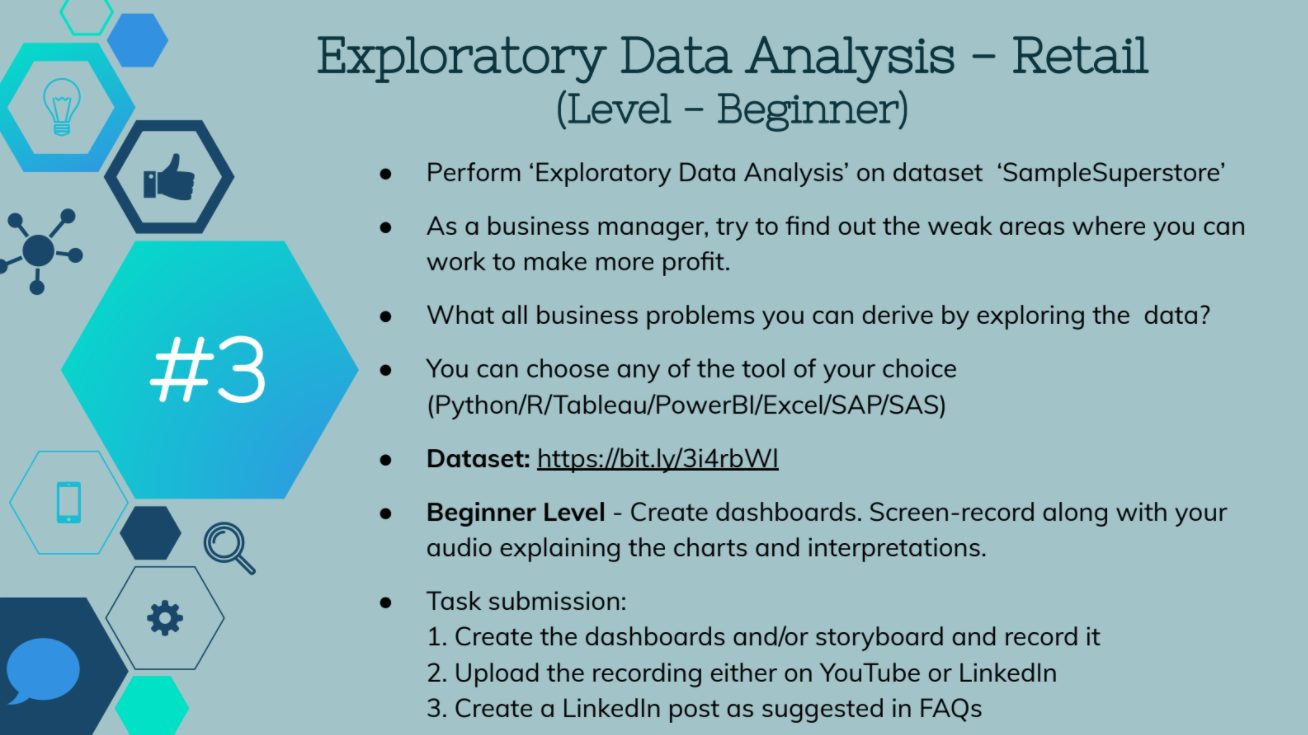

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/AumJain2305/GRIP-SPARKS/main/SampleSuperstore.csv')
data.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [ ]:
data.corr()

,Postal Code,Sales,Quantity,Discount,Profit
Postal Code,1.000000,-0.023854,0.012761,0.058443,-0.029961
Sales,-0.023854,1.000000,0.200795,-0.028190,0.479064
Quantity,0.012761,0.200795,1.000000,0.008623,0.066253
Discount,0.058443,-0.028190,0.008623,1.000000,-0.219487
Profit,-0.029961,0.479064,0.066253,-0.219487,1.000000


Legend


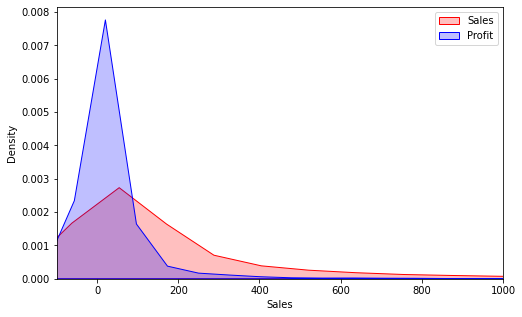

In [ ]:

plt.figure(figsize=(8,5))
sns.kdeplot(data['Sales'],color='red',label='Sales',shade='True')
sns.kdeplot(data['Profit'],color='Blue',label='Profit',shade='True')
plt.xlim([-100,1000])
a = plt.legend()
print(a)

           Count
Profit     30578
No-Profit    255
Loss        7040


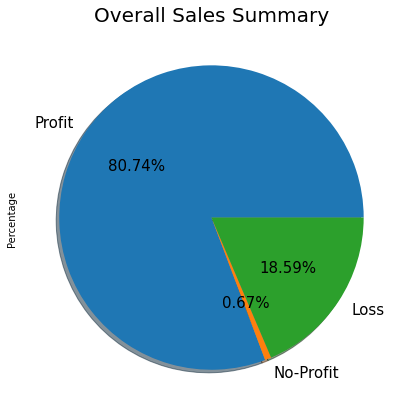

In [ ]:

# Plotting Overall Sales Summary
summary = pd.DataFrame({'Profit':data.Quantity[data.Profit > 0].sum(), 
                        'No-Profit':data.Quantity[data.Profit == 0].sum(), 
                        'Loss':data.Quantity[(-data.Profit) > 0].sum()},
                       index={'Count'}).T
print(summary)
plt.title('Overall Sales Summary', fontsize=20)
summary.Count.plot.pie(autopct='%1.2f%%',figsize=(7,7), label='Percentage', 
                       textprops = {"fontsize":15}, shadow=True)
plt.show()

                Postal Code         Sales  Quantity  Discount       Profit
Ship Mode                                                                 
Same Day           31242093  1.283631e+05      1960     82.75   15891.7589
First Class        84229511  3.514284e+05      5693    253.17   48969.8399
Second Class      108192588  4.591936e+05      7423    270.15   57446.6354
Standard Class    327908460  1.358216e+06     22797    955.02  164088.7875
                Postal Code         Sales  Quantity  Discount       Profit
Ship Mode                                                                 
Same Day           31242093  1.283631e+05      1960     82.75   15891.7589
First Class        84229511  3.514284e+05      5693    253.17   48969.8399
Second Class      108192588  4.591936e+05      7423    270.15   57446.6354
Standard Class    327908460  1.358216e+06     22797    955.02  164088.7875


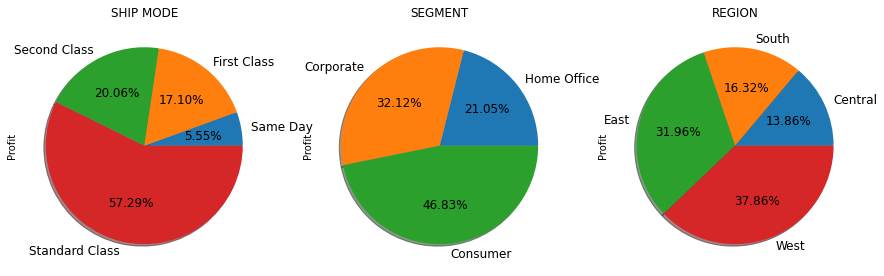

In [ ]:
prof_S = data.groupby('Ship Mode').sum().sort_values('Profit')
print(prof_S)
prof_S = pd.DataFrame(data.groupby('Ship Mode').sum()).sort_values('Profit', ascending = 'True')
print(prof_S)
prof_G = pd.DataFrame(data.groupby('Segment').sum()).sort_values('Profit')
prof_R = pd.DataFrame(data.groupby('Region').sum()).sort_values('Profit')
fig, ax = plt.subplots(1,3, figsize=(15,5))
ax[0].set_title('SHIP MODE', fontsize=12)
ax[1].set_title('SEGMENT', fontsize=12)
ax[2].set_title('REGION', fontsize=12)
prof_S.Profit.plot.pie(autopct='%1.2f%%', textprops = {"fontsize":12}, shadow=True, ax=ax[0])
prof_G.Profit.plot.pie(autopct='%1.2f%%', textprops = {"fontsize":12}, shadow=True, ax=ax[1])
prof_R.Profit.plot.pie(autopct='%1.2f%%', textprops = {"fontsize":12}, shadow=True, ax=ax[2])
plt.show()

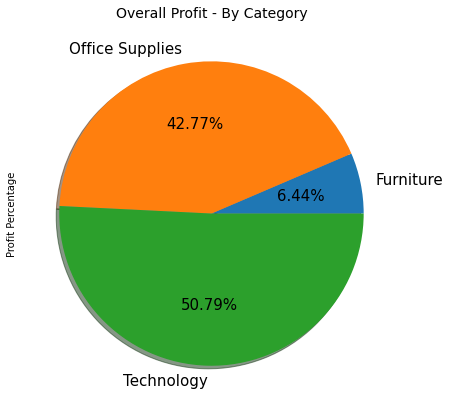

In [ ]:
cat = data.groupby('Category').sum().sort_values('Profit')
plt.title('Overall Profit - By Category', fontsize=14)
cat.Profit.plot.pie(autopct='%1.2f%%', figsize=(7,7), label='Profit Percentage', 
                    textprops = {"fontsize":15}, shadow=True)
plt.show()

Total items Sold: 37873


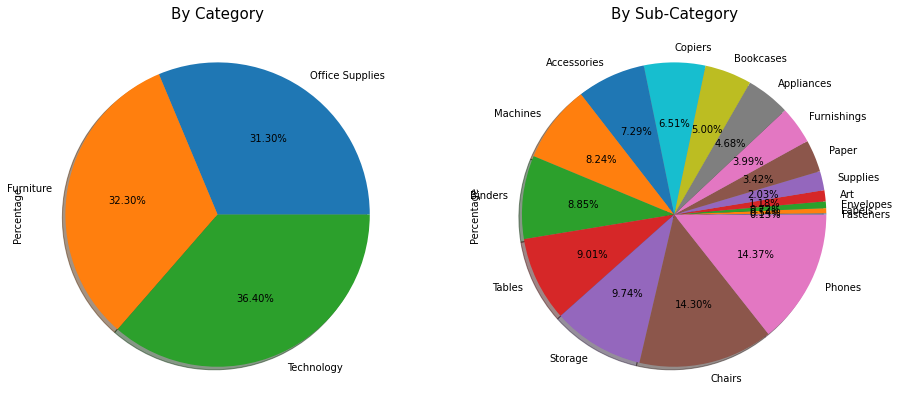

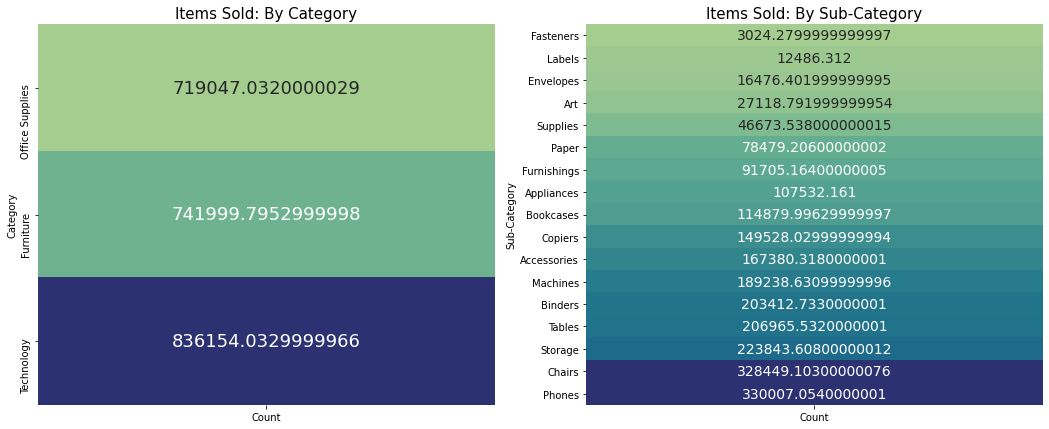

In [ ]:
cat = data.groupby('Category').sum().iloc[:,1].sort_values().to_frame('Count')
sub = data.groupby('Sub-Category').sum().iloc[:,1].sort_values().to_frame('Count')
print(f'Total items Sold: {data.Quantity.sum()}')
fig, ax = plt.subplots(1,2, figsize=(15,10))
ax[0].set_title('By Category', fontsize=15)
ax[1].set_title('By Sub-Category', fontsize=15)
cat.Count.plot.pie(autopct='%1.2f%%', label='Percentage', radius=1, shadow=True, ax=ax[0])
sub.Count.plot.pie(autopct='%1.2f%%', label='Percentage', radius=1, shadow=True, ax=ax[1])
plt.show()
fig, ax = plt.subplots(1,2, figsize=(18,7))
ax[0].set_title('Items Sold: By Category', fontsize=15)
ax[1].set_title('Items Sold: By Sub-Category', fontsize=15)
sns.heatmap(cat, ax=ax[0], cbar=False, annot=True, cmap='crest', fmt='2', annot_kws={'size':18})
sns.heatmap(sub, ax=ax[1], annot=True, cbar=False, cmap='crest', fmt='2', annot_kws={'size':14})
plt.show()
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


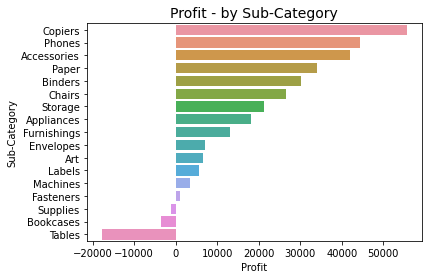

In [ ]:
sub = data.groupby('Sub-Category').sum().sort_values('Profit',ascending = False)
plt.title('Profit - by Sub-Category', fontsize=14)
sns.barplot(sub.Profit,sub.index)
plt.show()

                      Postal Code        Sales  Quantity  Discount      Profit
State                                                                         
Texas                    75747693  170188.0458      3724    364.64 -25729.3563
Ohio                     20579836   78258.1360      1759    152.40 -16971.3766
Pennsylvania             11190565  116511.9140      2153    192.90 -15559.9603
Illinois                 29873772   80166.1010      1845    191.90 -12607.8870
North Carolina            6994384   55603.1640       983     70.60  -7490.9122
Colorado                 14613828   32108.1180       693     57.60  -6527.8579
Tennessee                 6890574   30661.8730       681     53.30  -5341.6936
Arizona                  19102126   35282.0010       862     68.00  -3427.9246
Florida                  12640225   89473.7080      1379    114.65  -3399.3017
Oregon                   12072125   17431.1500       499     35.80  -1190.4705
Wyoming                     82001    1603.1360      

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


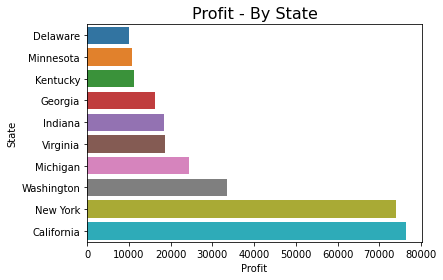

In [ ]:
sub1 = data.groupby('State').sum().sort_values('Profit', ascending='True')
print(sub1)
plt.title('Profit - By State', fontsize = 16)
sns.barplot(sub1.Profit[-10:], sub1.index[-10:])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


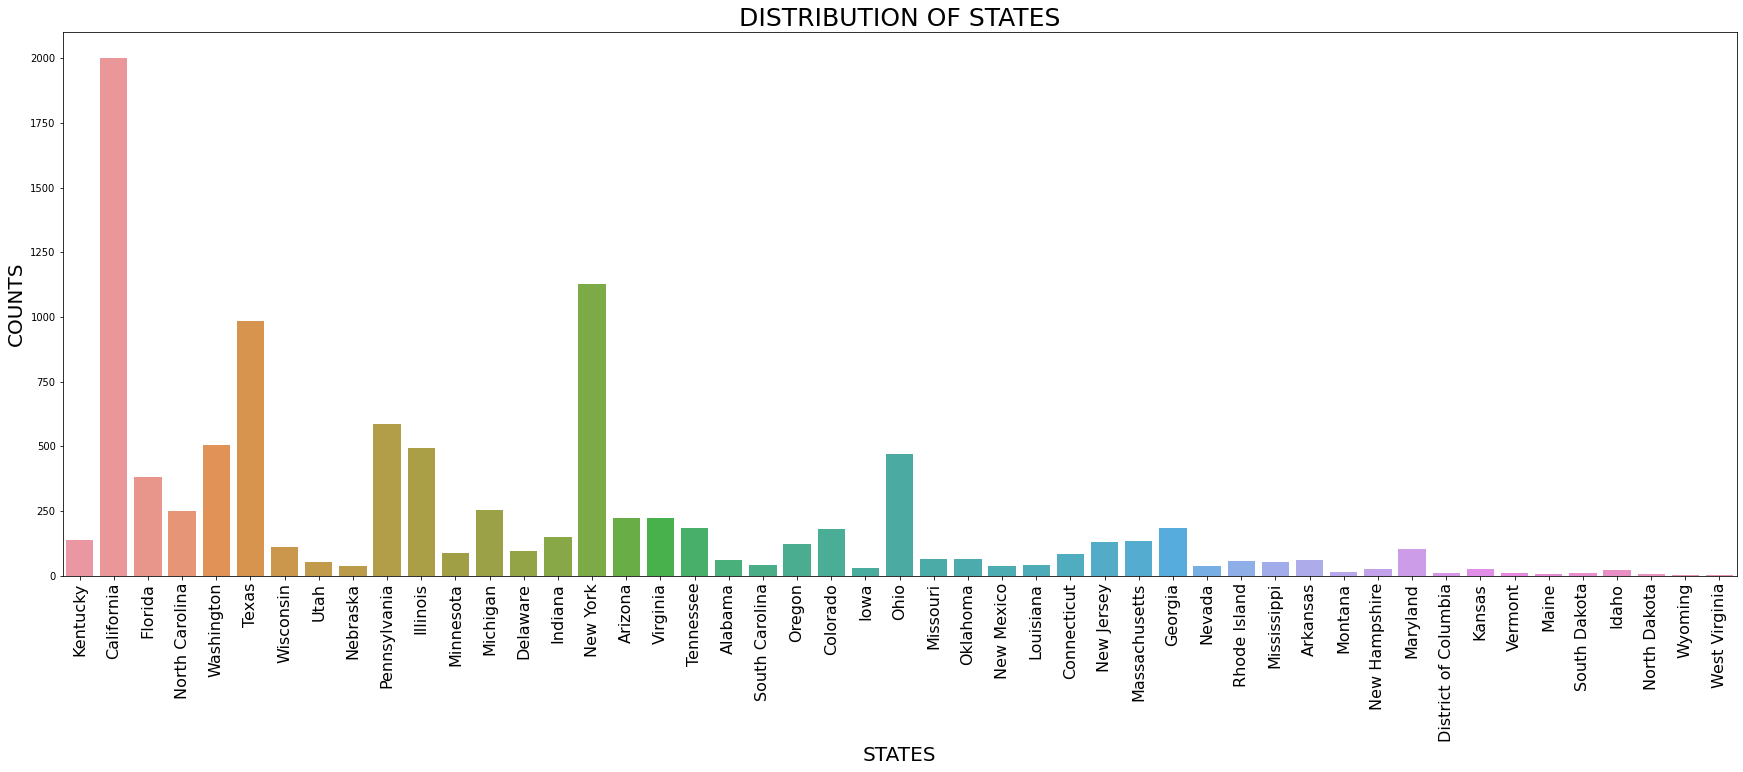

In [ ]:

plt.figure(figsize=(30,10))
sns.countplot(data['State'])
plt.xticks(fontsize=16,rotation=90)
plt.ylabel('COUNTS',fontsize=20)
plt.xlabel('STATES',fontsize=20)
plt.title('DISTRIBUTION OF STATES',fontsize=25);

plt.show()

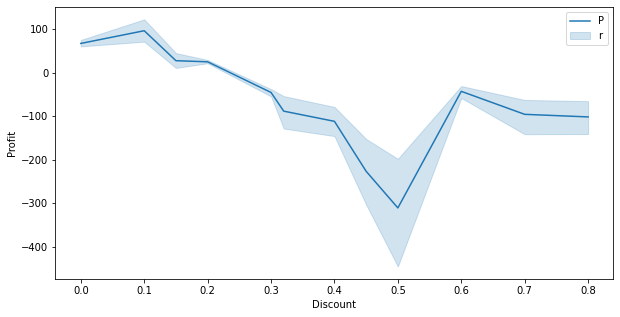

In [ ]:

plt.figure(figsize=(10,5))
sns.lineplot(x='Discount',y='Profit',data=data)
plt.legend('Profit')

*   Profit and Discount is high in **First Class**
*   Sales is high for Same day ship
*   Minimun profit obtain in **Furniture**
*   Maximun sales and Profit obtain in **Technology**.
*   State: **Vermont:** Highest Profit. 
*   State: **Ohio:** Lowest Profit
*   Sub-category: **Copier:** High Profit & sales.
*   Sub-category: **Binders** , Machines and then tables have high Discount
*   Segment: **Home-office**: High Profit & sales.
